In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly_express as px

In [2]:
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('New and Condensed Dataset Columns Not Null.csv')

In [4]:
len(df)

288762

In [5]:
df.head()

Unnamed: 0  Unnamed: 0.1    ID    Source    TMC  Severity  \
0           0             0   A-1  MapQuest  201.0         3   
1           1            10  A-11  MapQuest  201.0         3   
2           2            20  A-21  MapQuest  201.0         2   
3           3            30  A-31  MapQuest  201.0         2   
4           4            40  A-41  MapQuest  201.0         2   

            Start_Time             End_Time  \
0  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  2016-02-08 08:14:42  2016-02-08 08:44:42   
2  2016-02-08 10:11:15  2016-02-08 10:41:15   
3  2016-02-08 16:16:08  2016-02-08 16:46:08   
4  2016-02-09 05:40:57  2016-02-09 06:10:57   

   Time_Elapsed_From_Accident(Seconds)  Time_Elapsed_From_Accident(Minutes)  \
0                                18840                                314.0   
1                                 1800                                 30.0   
2                                 1800                                 30.0   
3                                 1800                                 30.0   
4                                 1800                                 30.0   

     ...    Station  Stop Traffic_Calming Traffic_Signal Turning_Loop  \
0    ...         No    No              No             No           No   
1    ...         No    No              No             No           No   
2    ...         No    No              No             No           No   
3    ...         No    No              No            Yes           No   
4    ...         No    No              No             No           No   

  Sunrise_Sunset Civil_Twilight Nautical_Twilight  Astronomical_Twilight  \
0          Night          Night             Night                  Night   
1            Day            Day               Day                    Day   
2            Day            Day               Day                    Day   
3            Day            Day               Day                    Day   
4          Night          Night             Night                  Night   

   Twilight  
0     Night  
1       Day  
2       Day  
3       Day  
4     Night  

[5 rows x 65 columns]

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288762 entries, 0 to 288761
Data columns (total 65 columns):
Unnamed: 0                             288762 non-null int64
Unnamed: 0.1                           288762 non-null int64
ID                                     288762 non-null object
Source                                 288762 non-null object
TMC                                    218462 non-null float64
Severity                               288762 non-null int64
Start_Time                             288762 non-null object
End_Time                               288762 non-null object
Time_Elapsed_From_Accident(Seconds)    288762 non-null int64
Time_Elapsed_From_Accident(Minutes)    288762 non-null float64
Month                                  288762 non-null object
Year                                   288762 non-null int64
Start Date                             288762 non-null object
End Date                               288762 non-null object
Start Time              

In [6]:
type(df.corr())

pandas.core.frame.DataFrame

In [7]:
# Correlation Matrix

#correlation
correlation = df.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )



layout = go.Layout(dict(title={
                    'text': "Correlation Matrix For Variables",
                    'y':0.95,
                    'x':0.55,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                        height  = 1000
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
#iplot(fig)
fig.show()
plot(fig, filename='Correlation Matrix For Variables in Entire Dataframe.html')

'Correlation Matrix For Variables in Entire Dataframe.html'

In [8]:
# Making df_severe dataframe
df_severe = df[(df['Severity'] == 3) | (df['Severity'] == 4)]

In [9]:
len(df_severe)

95176

In [10]:
# Correlation Matrix

#correlation
correlation = df_severe.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title={
                    'text': "Correlation Matrix For Variables",
                    'y':0.95,
                    'x':0.55,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                        height  = 1000
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
#iplot(fig)
fig.show()
plot(fig, filename='Correlation Matrix For Variables in df_severe Dataframe.html')

'Correlation Matrix For Variables in df_severe Dataframe.html'

In [14]:
df['State'].value_counts()[:15]

CA    64326
TX    29010
FL    21799
SC    14209
NC    14044
NY    13531
PA     8845
MI     8844
IL     8573
GA     8227
VA     7623
OR     6896
MN     6139
WA     6029
AZ     5991
Name: State, dtype: int64

In [15]:
print(df['State'].value_counts()[:15].keys().tolist())
print(df['State'].value_counts()[:15].tolist())

['CA', 'TX', 'FL', 'SC', 'NC', 'NY', 'PA', 'MI', 'IL', 'GA', 'VA', 'OR', 'MN', 'WA', 'AZ']
[64326, 29010, 21799, 14209, 14044, 13531, 8845, 8844, 8573, 8227, 7623, 6896, 6139, 6029, 5991]


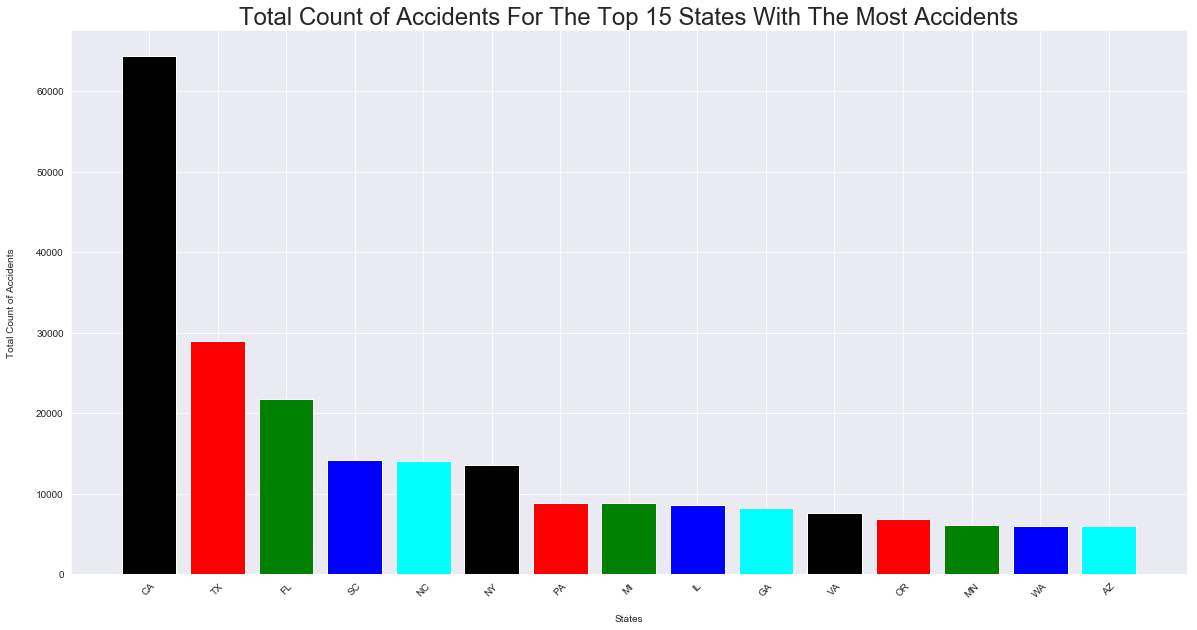

In [16]:
states = df['State'].value_counts()[:15].keys().tolist()
values = df['State'].value_counts()[:15].tolist()
plt.bar(states, values, color=['black', 'red', 'green', 'blue', 'cyan'])
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.xticks(states, rotation = 45)
plt.xlabel("States", labelpad = 15)
plt.ylabel('Total Count of Accidents', labelpad = 20)
plt.title('Total Count of Accidents For The Top 15 States With The Most Accidents')
plt.show()

In [17]:
colors=['black', 'red', 'green', 'blue', 'orange', 'black', 'red', 'green', 'blue', 'orange', 'black', 'red', 'green', 'blue', 'orange']
layout = go.Layout(dict(title = "Total Count of Accidents For The Top 15 States With The Most Accidents",
                       xaxis_title = 'States',
                       yaxis_title = 'Total Count'))
fig = go.Figure(layout=layout)
fig.update_layout(
    title={
        'text': "Total Count of Accidents For The Top 15 States With The Most Accidents",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.add_trace(go.Bar(x=states, y=values, marker=dict(color = colors)))
fig.show()
plot(fig, filename='Total Count of Accidents For The Top 15 States With The Most Accidents.html')

'Total Count of Accidents For The Top 15 States With The Most Accidents.html'

In [18]:
df['City'].value_counts()[:15]

Houston          9085
Charlotte        6776
Los Angeles      6465
Dallas           5769
Austin           5747
Raleigh          3885
Atlanta          3781
Miami            3101
Oklahoma City    3087
Baton Rouge      3035
Nashville        2797
Orlando          2527
Sacramento       2520
Seattle          2404
Phoenix          2277
Name: City, dtype: int64

In [19]:
df_severe['State'].value_counts()[:15]

CA    21293
TX     8068
FL     7792
NY     5396
GA     4861
MI     3679
VA     3537
SC     3117
IL     2744
MN     2471
WA     2381
PA     2249
OH     2225
NC     2017
TN     1926
Name: State, dtype: int64

In [20]:
df_severe['City'].value_counts()[:10]

Los Angeles     2685
Atlanta         2396
Dallas          2188
Houston         2086
Miami           1168
Jacksonville    1118
San Diego       1034
Minneapolis      995
Saint Paul       815
Denver           794
Name: City, dtype: int64

In [21]:
len(df_severe[(df_severe['City'] == 'Dallas') & (df_severe['State'] == 'TX')])

2184

In [22]:
len(df_severe[(df_severe['City'] == 'Dallas') & (df_severe['State'] != 'TX')])

4

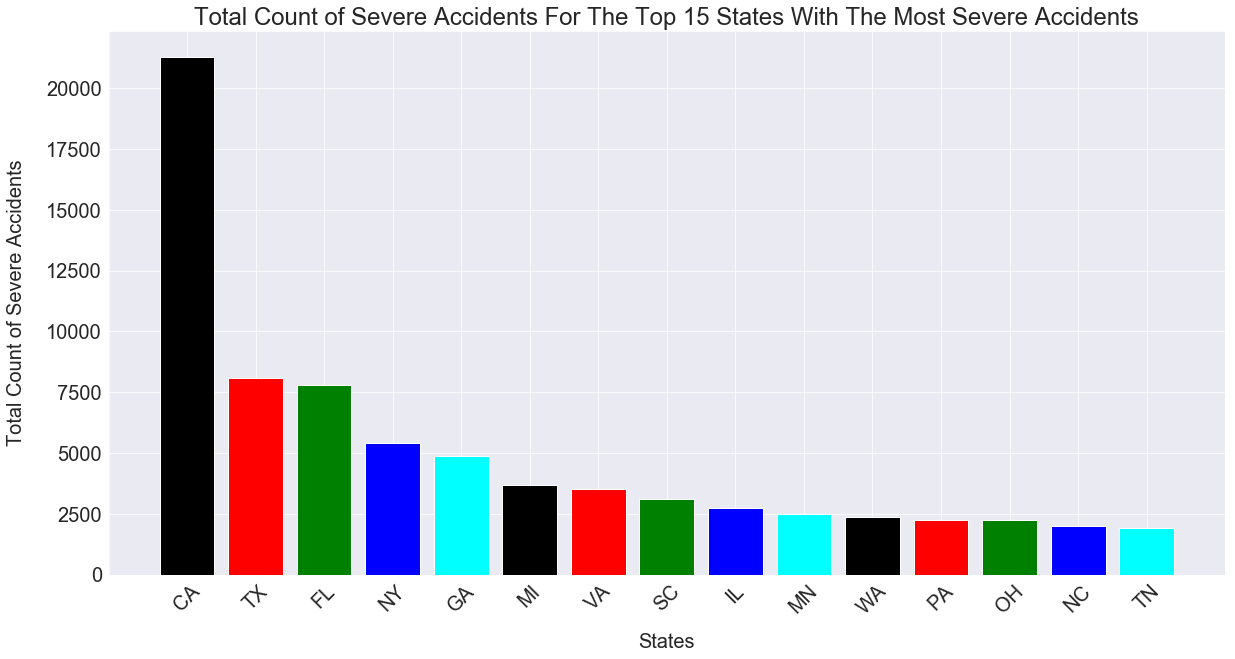

In [23]:
states = df_severe['State'].value_counts()[:15].keys().tolist()
severe_values = df_severe['State'].value_counts()[:15].tolist()
plt.bar(states, severe_values, color=['black', 'red', 'green', 'blue', 'cyan'])
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.xticks(states, rotation = 45)
plt.xlabel("States", labelpad = 15)
plt.ylabel('Total Count of Severe Accidents', labelpad = 20)
plt.title('Total Count of Severe Accidents For The Top 15 States With The Most Severe Accidents')
plt.show()

In [24]:
colors=['black', 'red', 'green', 'blue', 'orange', 'black', 'red', 'green', 'blue', 'orange', 'black', 'red', 'green', 'blue', 'orange']
layout = go.Layout(dict(title = "Total Count of Severe Accidents For The Top 15 States With The Most Severe Accidents",
                       xaxis_title = 'States',
                       yaxis_title = 'Total Count'))
fig = go.Figure(layout=layout)
fig.update_layout(
    title={
        'text': "Total Count of Severe Accidents For The Top 15 States With The Most Severe Accidents",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.add_trace(go.Bar(x=states, y=severe_values, marker=dict(color = colors)))
fig.show()
plot(fig, filename='Total Count of Severe Accidents For The Top 15 States With The Most Severe Accidents.html')

'Total Count of Severe Accidents For The Top 15 States With The Most Severe Accidents.html'

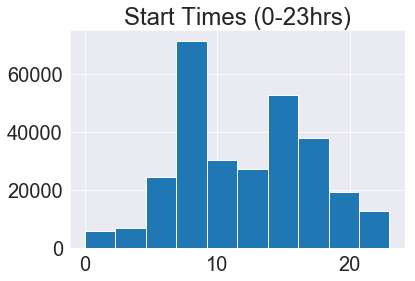

In [25]:
df['Start Hour'].hist()
plt.title('Start Times (0-23hrs)')
plt.show()

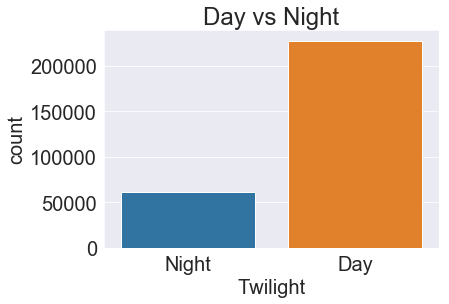

In [26]:
sns.countplot(df['Twilight'])
plt.title('Day vs Night')
plt.show()

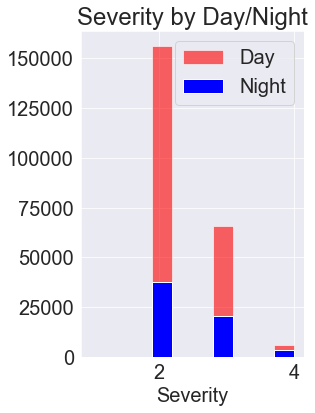

In [27]:
plt.figure(figsize=(4,6))
df[df['Twilight']=="Day"]['Severity'].hist(color='red',label='Day',alpha=0.6)
df[df['Twilight']=="Night"]['Severity'].hist(color='blue',label='Night')
plt.xlabel("Severity")
plt.legend()
plt.title('Severity by Day/Night')
plt.show()

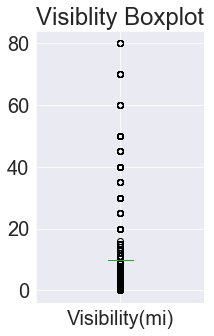

In [30]:
plt.figure(figsize=(3,5))
boxplot = df.boxplot(column=['Visibility(mi)'])
plt.title('Visiblity Boxplot')
plt.show()

In [31]:
poi_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
              'Traffic_Calming', 'Traffic_Signal']
for i in poi_columns:
    print(df[i].value_counts())

No     285311
Yes      3451
Name: Amenity, dtype: int64
No     288717
Yes        45
Name: Bump, dtype: int64
No     268382
Yes     20380
Name: Crossing, dtype: int64
No     288071
Yes       691
Name: Give_Way, dtype: int64
No     265760
Yes     23002
Name: Junction, dtype: int64
No     288420
Yes       342
Name: No_Exit, dtype: int64
No     286354
Yes      2408
Name: Railway, dtype: int64
No     288744
Yes        18
Name: Roundabout, dtype: int64
No     283254
Yes      5508
Name: Station, dtype: int64
No     284850
Yes      3912
Name: Stop, dtype: int64
No     288644
Yes       118
Name: Traffic_Calming, dtype: int64
No     239757
Yes     49005
Name: Traffic_Signal, dtype: int64


In [32]:
poi_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
              'Traffic_Calming', 'Traffic_Signal']
lst = []
for i in poi_columns:
    lst.append(df[i].value_counts()[1])
lst, poi_columns = (list(t) for t in zip(*sorted(zip(lst, poi_columns))))
poi_columns = list(poi_columns)
lst = list(lst)
print(poi_columns)
print(lst)
print('#######################################################')
poi_columns = poi_columns[::-1]
lst = lst[::-1]
print(poi_columns)
print(lst)

['Roundabout', 'Bump', 'Traffic_Calming', 'No_Exit', 'Give_Way', 'Railway', 'Amenity', 'Stop', 'Station', 'Crossing', 'Junction', 'Traffic_Signal']
[18, 45, 118, 342, 691, 2408, 3451, 3912, 5508, 20380, 23002, 49005]
#######################################################
['Traffic_Signal', 'Junction', 'Crossing', 'Station', 'Stop', 'Amenity', 'Railway', 'Give_Way', 'No_Exit', 'Traffic_Calming', 'Bump', 'Roundabout']
[49005, 23002, 20380, 5508, 3912, 3451, 2408, 691, 342, 118, 45, 18]


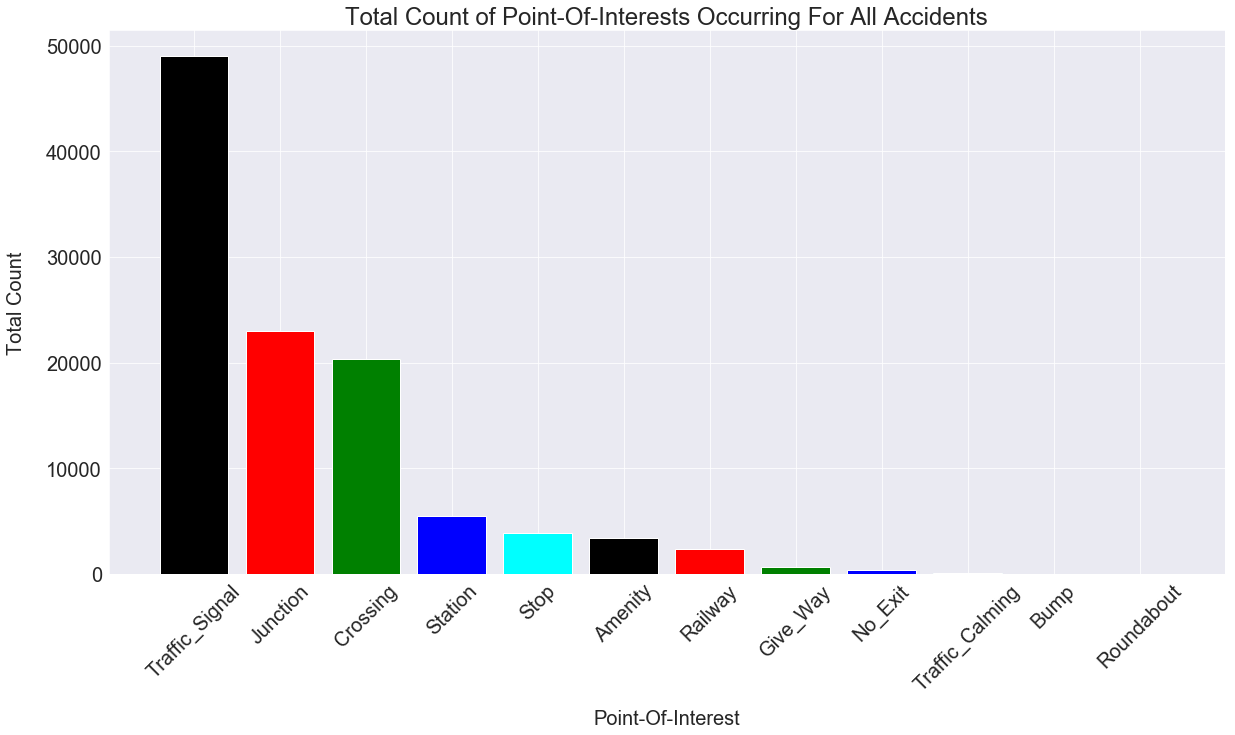

In [33]:
plt.bar(poi_columns, lst, color=['black', 'red', 'green', 'blue', 'cyan'])
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.xticks(poi_columns, rotation = 45)
plt.xlabel("Point-Of-Interest", labelpad = 15)
plt.ylabel('Total Count', labelpad = 20)
plt.title('Total Count of Point-Of-Interests Occurring For All Accidents')
plt.show()

In [34]:
colors=['black', 'red', 'green', 'blue', 'cyan', 'orange', 'yellow', 'purple', 'pink']
layout = go.Layout(dict(title = "Total Count of Point-Of-Interests Occurring For All Accidents",
                       xaxis_title = 'Point-Of-Interest',
                       yaxis_title = 'Total Count'))
fig = go.Figure(layout=layout)
fig.update_layout(
    title={
        'text': "Total Count of Point-Of-Interests Occurring For All Accidents",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.add_trace(go.Bar(x=poi_columns, y=lst, marker=dict(color = colors)))
fig.show()
plot(fig, filename='Total Count of Point-Of-Interests Occurring For All Accidents.html')

'Total Count of Point-Of-Interests Occurring For All Accidents.html'

In [35]:
poi_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
              'Traffic_Calming', 'Traffic_Signal']
for i in poi_columns:
    print(df_severe[i].value_counts())

No     94855
Yes      321
Name: Amenity, dtype: int64
No     95171
Yes        5
Name: Bump, dtype: int64
No     93402
Yes     1774
Name: Crossing, dtype: int64
No     95032
Yes      144
Name: Give_Way, dtype: int64
No     85192
Yes     9984
Name: Junction, dtype: int64
No     95092
Yes       84
Name: No_Exit, dtype: int64
No     94734
Yes      442
Name: Railway, dtype: int64
No     95174
Yes        2
Name: Roundabout, dtype: int64
No     94444
Yes      732
Name: Station, dtype: int64
No     94907
Yes      269
Name: Stop, dtype: int64
No     95155
Yes       21
Name: Traffic_Calming, dtype: int64
No     89752
Yes     5424
Name: Traffic_Signal, dtype: int64


In [36]:
poi_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
              'Traffic_Calming', 'Traffic_Signal']
lst = []
for i in poi_columns:
    lst.append(df_severe[i].value_counts()[1])
lst, poi_columns = (list(t) for t in zip(*sorted(zip(lst, poi_columns))))
poi_columns = list(poi_columns)
lst = list(lst)
print(poi_columns)
print(lst)
print('#######################################################')
poi_columns = poi_columns[::-1]
lst = lst[::-1]
print(poi_columns)
print(lst)

['Roundabout', 'Bump', 'Traffic_Calming', 'No_Exit', 'Give_Way', 'Stop', 'Amenity', 'Railway', 'Station', 'Crossing', 'Traffic_Signal', 'Junction']
[2, 5, 21, 84, 144, 269, 321, 442, 732, 1774, 5424, 9984]
#######################################################
['Junction', 'Traffic_Signal', 'Crossing', 'Station', 'Railway', 'Amenity', 'Stop', 'Give_Way', 'No_Exit', 'Traffic_Calming', 'Bump', 'Roundabout']
[9984, 5424, 1774, 732, 442, 321, 269, 144, 84, 21, 5, 2]


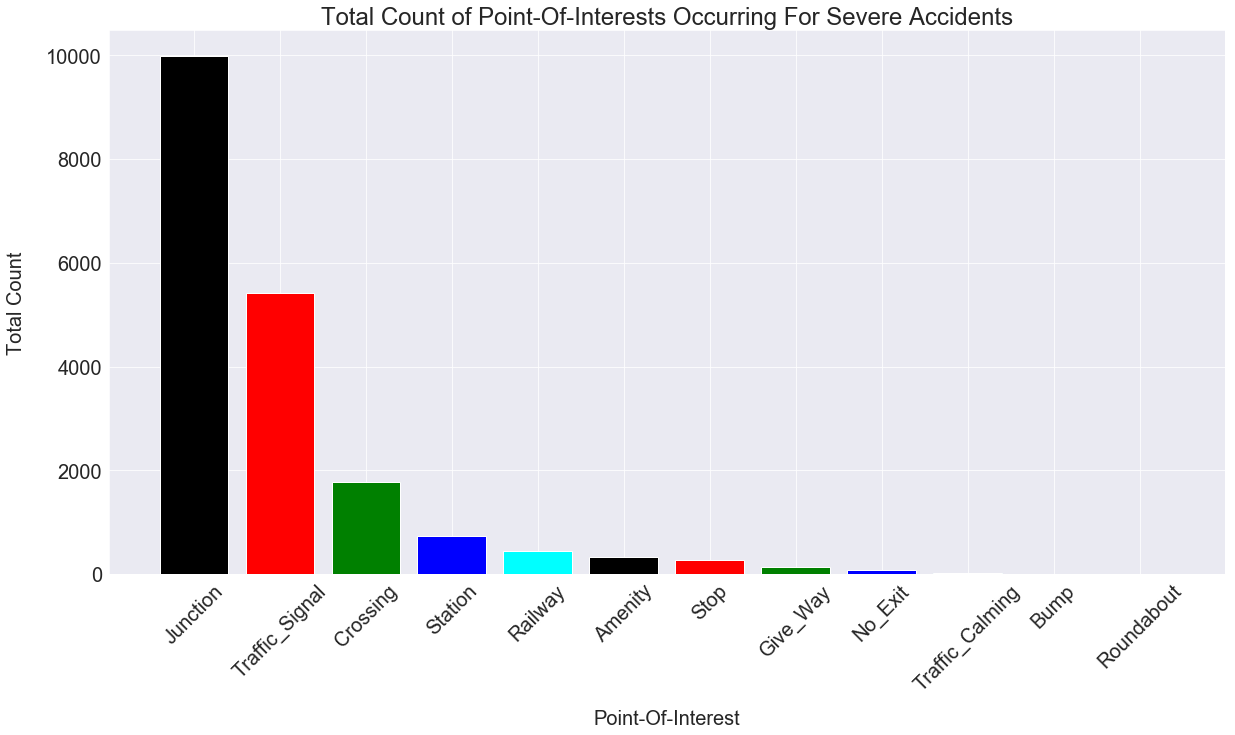

In [37]:
plt.bar(poi_columns, lst, color=['black', 'red', 'green', 'blue', 'cyan'])
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.xticks(poi_columns, rotation = 45)
plt.xlabel("Point-Of-Interest", labelpad = 15)
plt.ylabel('Total Count', labelpad = 20)
plt.title('Total Count of Point-Of-Interests Occurring For Severe Accidents')
plt.show()

In [38]:
colors=['black', 'red', 'green', 'blue', 'cyan', 'orange', 'yellow', 'purple', 'pink']
layout = go.Layout(dict(title = "Total Count of Point-Of-Interests Occurring For Severe Accidents",
                       xaxis_title = 'Point-Of-Interest',
                       yaxis_title = 'Total Count'))
fig = go.Figure(layout=layout)
fig.update_layout(
    title={
        'text': "Total Count of Point-Of-Interests Occurring For Severe Accidents",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.add_trace(go.Bar(x=poi_columns, y=lst, marker=dict(color = colors)))
fig.show()
plot(fig, filename='Total Count of Point-Of-Interests Occurring For Severe Accidents.html')

'Total Count of Point-Of-Interests Occurring For Severe Accidents.html'

In [39]:
poi_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
              'Traffic_Calming', 'Traffic_Signal']
df_poi = pd.DataFrame(columns = ['Time_Elapsed_From_Accident(Minutes)', 'Severity'])
for i in poi_columns:
    #print(type(df.groupby(i)[['Time_Elapsed_From_Accident(Minutes)', 'Severity']].mean()[df.groupby(i)[['Time_Elapsed_From_Accident(Minutes)', 'Severity']].mean().index == 'Yes'].rename(index = {'Yes': i}).loc[i]))
    row_df = df.groupby(i)[['Time_Elapsed_From_Accident(Minutes)', 'Severity']].mean()[df.groupby(i)[['Time_Elapsed_From_Accident(Minutes)', 'Severity']].mean().index == 'Yes'].rename(index = {'Yes': i}).loc[i]
    #df_poi = pd.concat(df.groupby(i)[['Time_Elapsed_From_Accident(Minutes)', 'Severity']].mean()[df.groupby(i)[['Time_Elapsed_From_Accident(Minutes)', 'Severity']].mean().index == 'Yes'].rename(index = {'Yes': i}))
    #df_poi = pd.concat(row_df, df_poi)
    df_poi = df_poi.append(row_df)
df_poi

Time_Elapsed_From_Accident(Minutes)  Severity
Amenity                                    72.336671  2.115619
Bump                                       53.437407  2.111111
Crossing                                   68.686295  2.104171
Give_Way                                   84.427689  2.254703
Junction                                  146.474113  2.477393
No_Exit                                    79.449903  2.257310
Railway                                    80.836988  2.204734
Roundabout                                 74.319444  2.222222
Station                                    73.244151  2.148693
Stop                                       66.874595  2.091258
Traffic_Calming                            70.093644  2.203390
Traffic_Signal                             69.898543  2.125701

In [40]:
poi_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
              'Traffic_Calming', 'Traffic_Signal']
time_elapsed_lst = []
severity_lst = []
for i in poi_columns:
    #print(df.groupby(i)[['Time_Elapsed_From_Accident(Minutes)', 'Severity']].mean().reset_index().iloc[1][2])
    #print()
    time_elapsed_lst.append(df.groupby(i)[['Time_Elapsed_From_Accident(Minutes)', 'Severity']].mean().reset_index().iloc[1][1])
    severity_lst.append(df.groupby(i)[['Time_Elapsed_From_Accident(Minutes)', 'Severity']].mean().reset_index().iloc[1][2])
print(time_elapsed_lst)
print()
print(severity_lst)

[72.33667053028115, 53.437407407407406, 68.68629456984031, 84.42768933912204, 146.47411312059722, 79.44990253411308, 80.83698781838328, 74.31944444444444, 73.24415093197779, 66.87459526244055, 70.0936440677966, 69.89854266571496]

[2.1156186612576064, 2.111111111111111, 2.104170755642787, 2.2547033285094065, 2.4773932701504218, 2.257309941520468, 2.204734219269103, 2.2222222222222223, 2.1486928104575163, 2.0912576687116564, 2.2033898305084745, 2.1257014590347922]


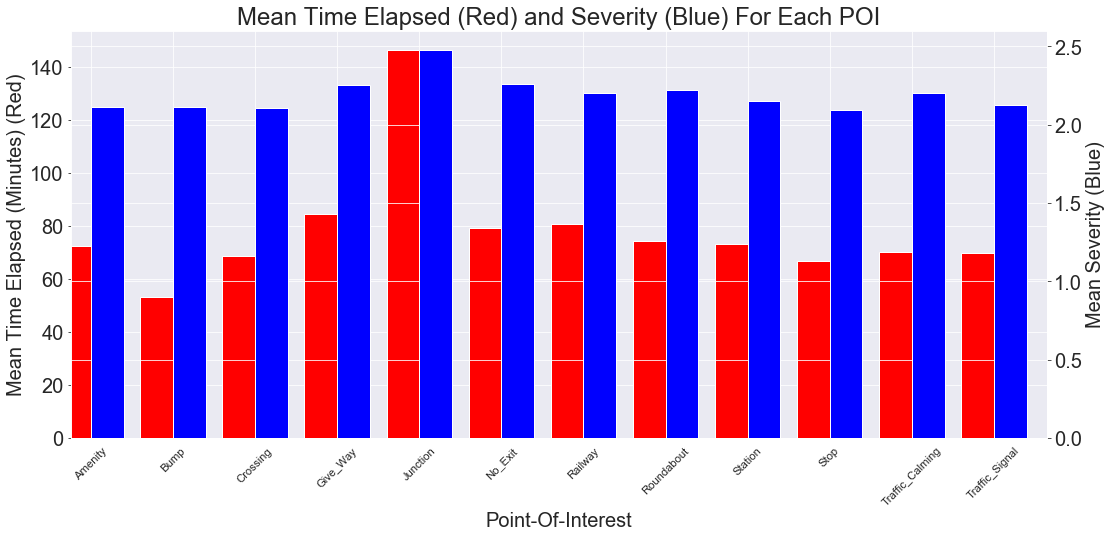

In [41]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
width = 0.4
figure = plt.gcf()
figure.set_size_inches(17.5, 7.5)
df_poi['Time_Elapsed_From_Accident(Minutes)'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
df_poi['Severity'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
ax.set_title('Mean Time Elapsed (Red) and Severity (Blue) For Each POI')
ax.set_xticklabels(df_poi.index, rotation = 45, fontsize = 11.25)
ax.set_xlabel('Point-Of-Interest')
ax.set_ylabel('Mean Time Elapsed (Minutes) (Red)')
ax2.set_ylabel('Mean Severity (Blue)')
plt.savefig('image1.jpg')
plt.show()

In [42]:
poi_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
              'Traffic_Calming', 'Traffic_Signal']
time_elapsed_lst = []
severity_lst = []
for i in poi_columns:
    #print(df.groupby(i)[['Time_Elapsed_From_Accident(Minutes)', 'Severity']].mean().reset_index().iloc[1][2])
    #print()
    time_elapsed_lst.append(df_severe.groupby(i)[['Time_Elapsed_From_Accident(Minutes)', 'Severity']].mean().reset_index().iloc[1][1])
    severity_lst.append(df_severe.groupby(i)[['Time_Elapsed_From_Accident(Minutes)', 'Severity']].mean().reset_index().iloc[1][2])
print(time_elapsed_lst)
print()
print(severity_lst)

[141.93774662512982, 48.09, 104.45753476136792, 112.34456018518519, 107.58675714476485, 89.5876984126984, 90.7002262443439, 360.0, 111.46391165755924, 152.294175960347, 116.92539682539683, 98.67295968534896]

[3.2429906542056073, 3.0, 3.1995490417136416, 3.2222222222222223, 3.1000600961538463, 3.0595238095238093, 3.1153846153846154, 4.0, 3.120218579234973, 3.3271375464684017, 3.142857142857143, 3.137905604719764]


In [43]:
poi_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
              'Traffic_Calming', 'Traffic_Signal']
df_poi_severe = pd.DataFrame(columns = ['Time_Elapsed_From_Accident(Minutes)', 'Severity'])
for i in poi_columns:
    #print(type(df.groupby(i)[['Time_Elapsed_From_Accident(Minutes)', 'Severity']].mean()[df.groupby(i)[['Time_Elapsed_From_Accident(Minutes)', 'Severity']].mean().index == 'Yes'].rename(index = {'Yes': i}).loc[i]))
    row_df = df_severe.groupby(i)[['Time_Elapsed_From_Accident(Minutes)', 'Severity']].mean()[df_severe.groupby(i)[['Time_Elapsed_From_Accident(Minutes)', 'Severity']].mean().index == 'Yes'].rename(index = {'Yes': i}).loc[i]
    #df_poi = pd.concat(df.groupby(i)[['Time_Elapsed_From_Accident(Minutes)', 'Severity']].mean()[df.groupby(i)[['Time_Elapsed_From_Accident(Minutes)', 'Severity']].mean().index == 'Yes'].rename(index = {'Yes': i}))
    #df_poi = pd.concat(row_df, df_poi)
    df_poi_severe = df_poi_severe.append(row_df)
df_poi_severe

Time_Elapsed_From_Accident(Minutes)  Severity
Amenity                                   141.937747  3.242991
Bump                                       48.090000  3.000000
Crossing                                  104.457535  3.199549
Give_Way                                  112.344560  3.222222
Junction                                  107.586757  3.100060
No_Exit                                    89.587698  3.059524
Railway                                    90.700226  3.115385
Roundabout                                360.000000  4.000000
Station                                   111.463912  3.120219
Stop                                      152.294176  3.327138
Traffic_Calming                           116.925397  3.142857
Traffic_Signal                             98.672960  3.137906

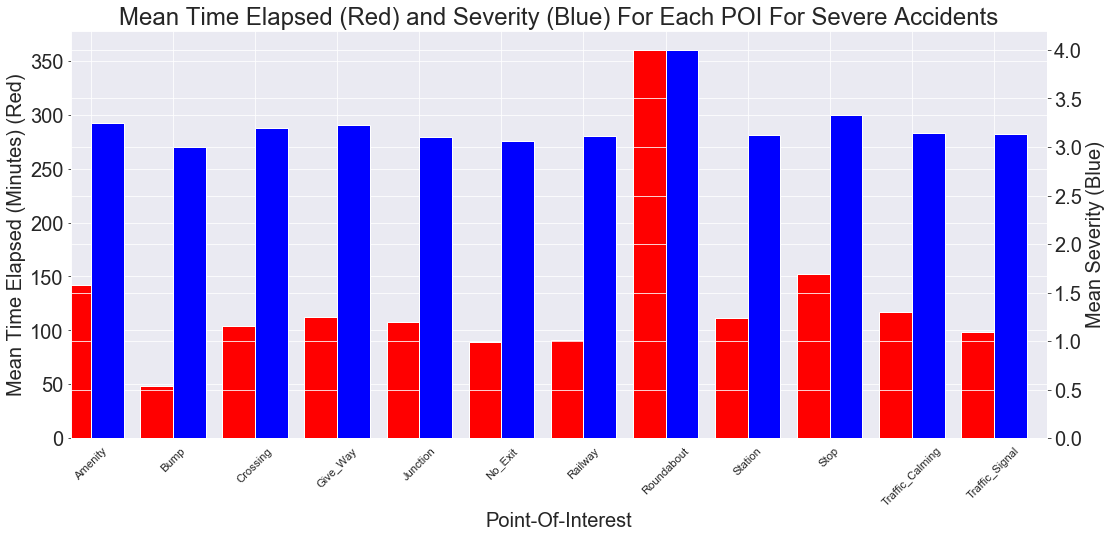

In [44]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
width = 0.4
figure = plt.gcf()
figure.set_size_inches(17.5, 7.5)
df_poi_severe['Time_Elapsed_From_Accident(Minutes)'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
df_poi_severe['Severity'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
ax.set_title('Mean Time Elapsed (Red) and Severity (Blue) For Each POI For Severe Accidents')
ax.set_xticklabels(labels = df_poi_severe.index, rotation = 45, fontsize = 11.25)
ax.set_xlabel('Point-Of-Interest')
ax.set_ylabel('Mean Time Elapsed (Minutes) (Red)')
ax2.set_ylabel('Mean Severity (Blue)')
plt.savefig('image2.jpg')
plt.show()

In [46]:
df['Weather_Condition'].value_counts()[:10]

Clear               80140
Mostly Cloudy       41097
Overcast            37946
Fair                33210
Partly Cloudy       29359
Scattered Clouds    20575
Light Rain          13796
Cloudy              11547
Light Snow           4191
Haze                 3369
Name: Weather_Condition, dtype: int64

In [47]:
# Making Houston, TX df
df_houston_tx = df[(df['City'] == 'Houston') & (df['State'] == 'TX')]

In [48]:
len(df_houston_tx)

9084

In [53]:
df_houston_tx_groupby_month_count_df = df_houston_tx.groupby(['Month', 'Season'])['ID'].count().to_frame().reset_index()
df_houston_tx_groupby_month_count_df.head()

Month  Season   ID
0  2016-06  Summer   71
1  2016-07  Summer  182
2  2016-08  Summer  212
3  2016-09    Fall  195
4  2016-10    Fall  224

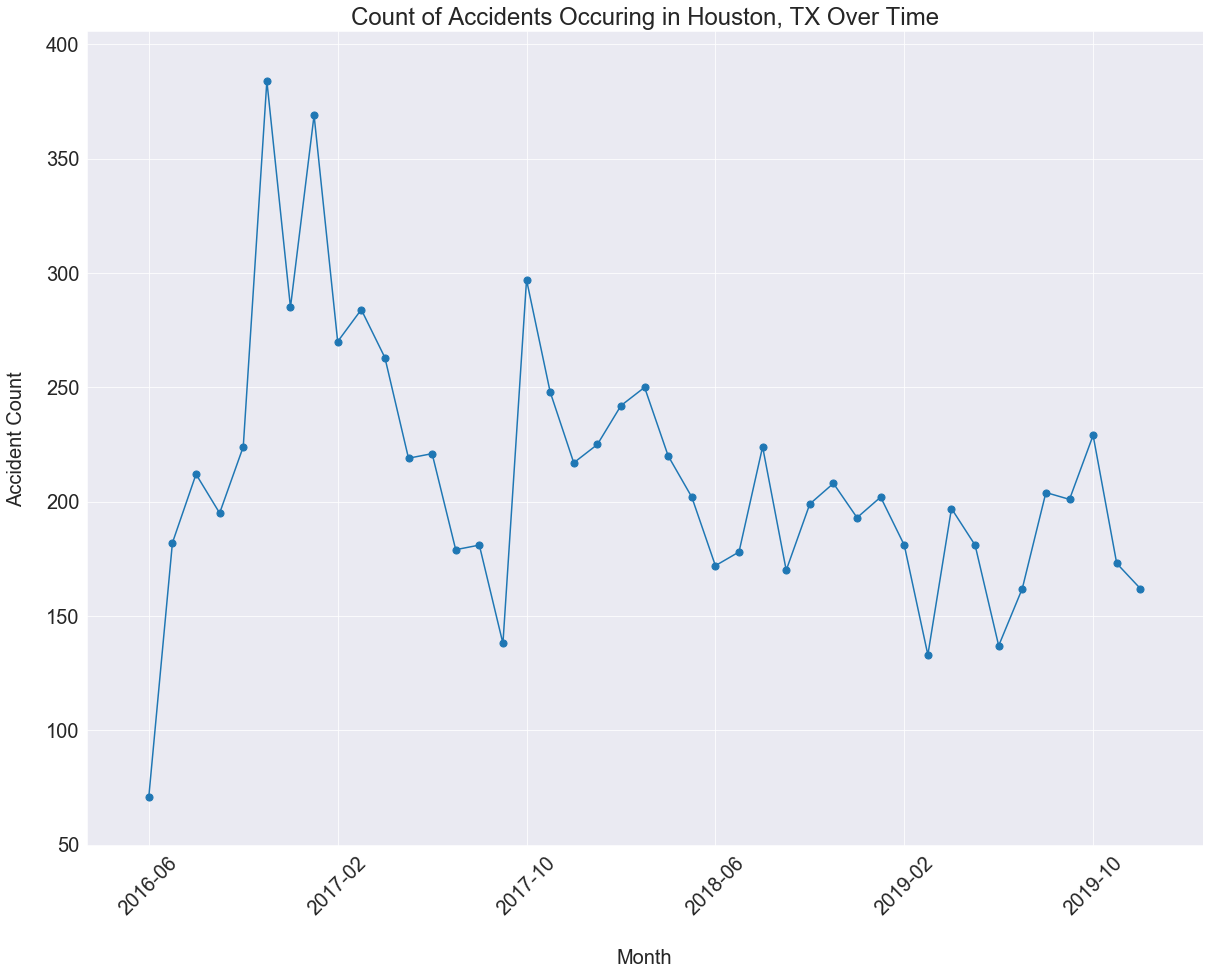

In [54]:
sns.set_style('darkgrid')
plt.plot(df_houston_tx_groupby_month_count_df['Month'].values, df_houston_tx_groupby_month_count_df['ID'].values)
plt.scatter(df_houston_tx_groupby_month_count_df['Month'].values, df_houston_tx_groupby_month_count_df['ID'].values, s=50)
fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.xticks(df_houston_tx_groupby_month_count_df['Month'].values[::8], rotation = 45)
plt.xlabel('Month', labelpad = 30)
plt.ylabel('Accident Count', labelpad= 20)
plt.title('Count of Accidents Occuring in Houston, TX Over Time')
plt.show()

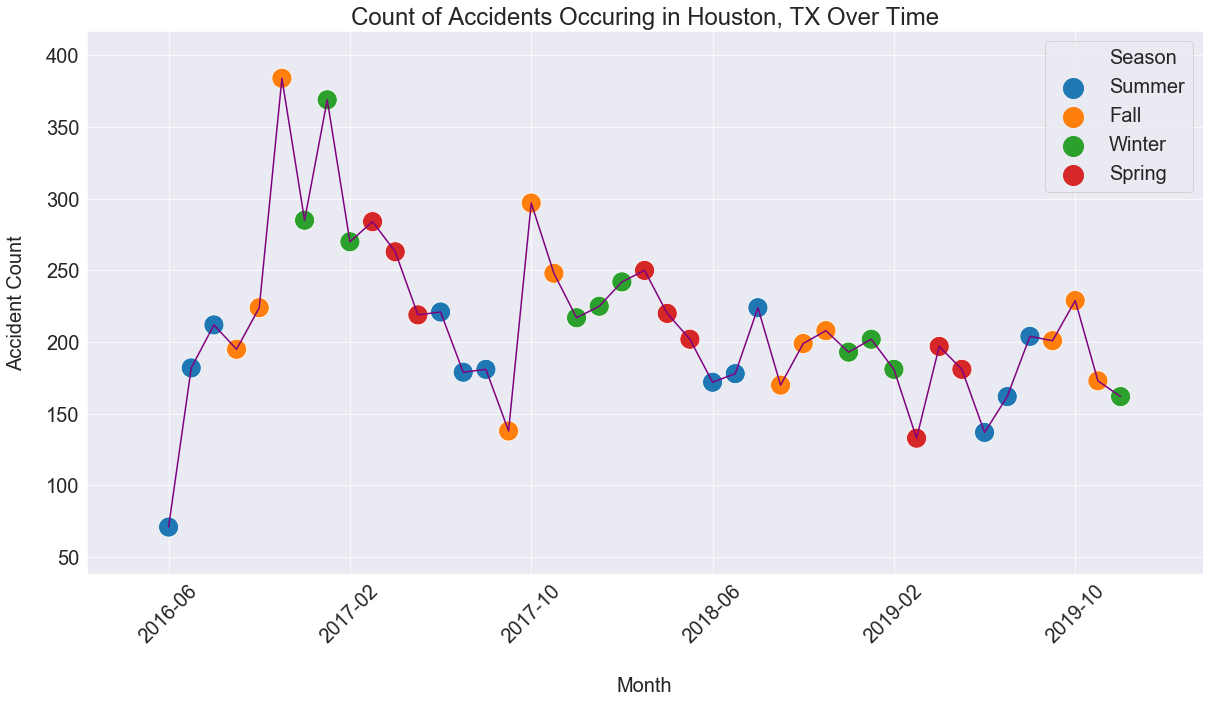

In [55]:
sns.set_style('darkgrid')
sns.lineplot(data=df_houston_tx_groupby_month_count_df, x ='Month', y='ID', color = 'purple')
sns.scatterplot(data=df_houston_tx_groupby_month_count_df, x ='Month', y='ID', hue='Season', size = 'Season', sizes = (400,400))
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.xticks(df_houston_tx_groupby_month_count_df['Month'].values[::8], rotation = 45)
plt.xlabel('Month', labelpad = 30)
plt.ylabel('Accident Count', labelpad= 20)
plt.title('Count of Accidents Occuring in Houston, TX Over Time')
plt.show()

In [56]:
layout = go.Layout(dict(title = "Count of Accidents Occuring in Houston, TX Over Time (Monthly Counts)",
                       xaxis_title = 'Month',
                       yaxis_title = 'Accident Count'))
fig = go.Figure(layout=layout)
fig.update_layout(
    title={
        'text': "Count of Accidents Occuring in Houston, TX Over Time (Monthly Counts)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.add_trace(go.Scatter(x=df_houston_tx_groupby_month_count_df['Month'].values, y=df_houston_tx_groupby_month_count_df['ID'].values,
                    mode='lines+markers'))
fig.show()
plot(fig, filename='Count of Accidents Occuring in Houston, TX Over Time (Monthly Counts).html')

'Count of Accidents Occuring in Houston, TX Over Time (Monthly Counts).html'

In [57]:
df_houston_tx_groupby_month_count_df.to_csv('C:\\Users\\peech\\OneDrive\\Documents\\ITSS 4354 - Advanced Big Data Analytics\\ITSS 4354 Group Project\\Houston Groupby Month Season Count.csv')

In [58]:
df_houston_tx_groupby_day_count_df = df_houston_tx.groupby('Start Date')['ID'].count().to_frame().reset_index()

In [59]:
len(df_houston_tx_groupby_day_count_df)

1209

In [60]:
df_houston_tx_groupby_day_count_df.head()

Start Date  ID
0  2016-06-21   7
1  2016-06-22   8
2  2016-06-23  14
3  2016-06-24   6
4  2016-06-25   1

In [61]:
layout = go.Layout(dict(title = "Count of Accidents Occuring in Houston, TX Over Time (Moving Average of 30 Days)",
                       xaxis_title = 'Month',
                       yaxis_title = 'Accident Count'))
fig = go.Figure(layout=layout)
fig.update_layout(
    title={
        'text': "Count of Accidents Occuring in Houston, TX Over Time (Moving Average of 30 Days)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.add_trace(go.Scatter(x=df_houston_tx.groupby('Start Date')['ID'].count().rolling(window = 30).mean().to_frame().reset_index()['Start Date'].values, y=df_houston_tx.groupby('Start Date')['ID'].count().rolling(window = 30).mean().to_frame().reset_index()['ID'].values,
                    mode='lines+markers'))
fig.show()
plot(fig, filename='Count of Accidents Occuring in Houston, TX Over Time (Moving Average of 30 Days).html')

'Count of Accidents Occuring in Houston, TX Over Time (Moving Average of 30 Days).html'

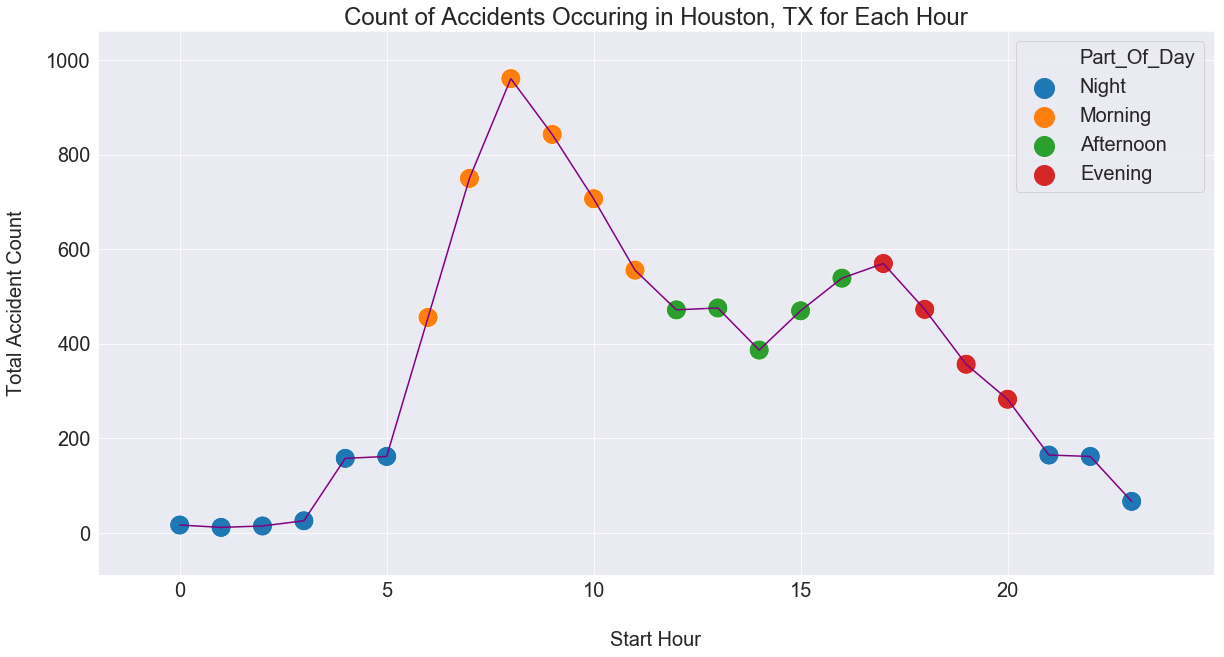

In [62]:
# df_houston_tx.groupby(['Start Hour', 'Part_Of_Day'])['ID'].count().to_frame().reset_index()
sns.set_style('darkgrid')
sns.lineplot(data=df_houston_tx.groupby(['Start Hour', 'Part_Of_Day'])['ID'].count().to_frame().reset_index(), x ='Start Hour', y='ID', color = 'purple')
sns.scatterplot(data=df_houston_tx.groupby(['Start Hour', 'Part_Of_Day'])['ID'].count().to_frame().reset_index(), x ='Start Hour', y='ID', hue='Part_Of_Day', size = 'Part_Of_Day', sizes = (400,400))
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.xticks(df_houston_tx.groupby(['Start Hour', 'Part_Of_Day'])['ID'].count().to_frame().reset_index()['Start Hour'].values[::5])
plt.xlabel('Start Hour', labelpad = 30)
plt.ylabel('Total Accident Count', labelpad= 20)
plt.title('Count of Accidents Occuring in Houston, TX for Each Hour')
plt.show()